# Кластеризация методом `K-means` для выделения групп объектов

В этой задаче будет рассмотрен метод кластеризации <code>K-means</code> для решения непосредственно задачи кластеризации — задачи выделения схожих структур в данных. Работать будем с известным набором данных <a href="http://yann.lecun.com/exdb/mnist/"><code>MNIST</code></a>.

Загрузим набор данных. Будем использовать только тестовую часть оригинального набора, чтобы сократить время обучения моделей.

In [84]:
from keras.datasets import mnist
import warnings
warnings.filterwarnings("ignore")

(_,_), (X, y) = mnist.load_data()

Пример вывода нескольких объектов и соответствующих меток классов:

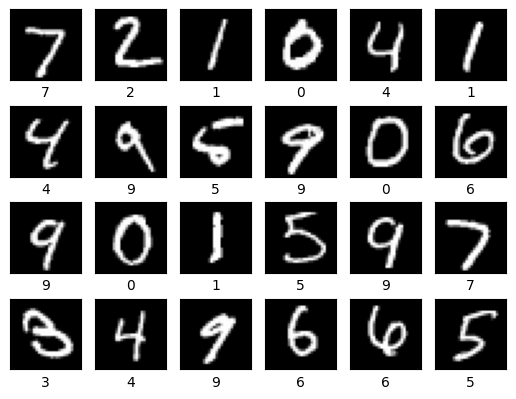

In [85]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(X[i], cmap='gray')
    axi.set(xticks=[], yticks=[])
    axi.set_xlabel(y[i],
                   color='black')

Введите <code>.shape</code> полученного набора данных

In [86]:
print(X.shape)

(10000, 28, 28)


При помощи <code>train_test_split</code> разобейте полученный набор данных на тренеровочную и тестовую выборки с параметрами, указанными в вашем варианте.

In [87]:
from sklearn.model_selection import train_test_split

random_state = 29

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

Давайте, раз речь идет об известном наборе данных, заставим <code>K-means</code> искать $10$ групп объектов.

«Распрямите» изображения и обучите алгоритм <a href="https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html"><code>KMeans</code></a> с параметрами, указанными в вашем задании.

In [88]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, random_state=random_state)
clusters = kmeans.fit_predict(X_train.reshape(-1, 784))

print(clusters)
print(clusters.shape)

[9 0 7 ... 2 6 1]
(8000,)


Определите чило элементов, отнесенных к кластеру, указанному в вашем задании

In [89]:
from collections import Counter
print(dict(Counter(clusters)))

{9: 695, 0: 584, 7: 632, 1: 935, 2: 1060, 5: 975, 8: 705, 4: 846, 3: 759, 6: 809}


Постройте изображения, соответствующие центроидам полученных кластеров. Для этого `reshape`ните координаты центроидов до размера $28 \times 28$ и постройте полученную матрицу, например, в черно-белых оттенках.



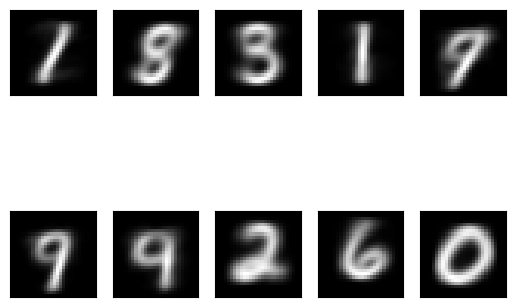

In [90]:
fig, ax = plt.subplots(2, 5)
centers = kmeans.cluster_centers_.reshape(10, 28, 28)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, cmap='gray')

Можно заметить, что получившиеся картинки весьма походят на рукописные цифры. Впрочем, кластеризация прошла не без накладок. Предположите, какие цифры могут быть перепутаны и каких не хватает.

Так как получившиеся кластеры ничего не знают о природе кластеризумых объектов, метки кластеров могут отличаться от «разумных меток». Восстановите правильные метки, используя следующие соображения: кластеру присваивается метка тех цифр, представителей которых в кластере большинство. Действительно ли это помогло восстановить справедливость?

Введите полученные метки кластеров после преобразования и сравните с ранее построенными изображениями на основе центроидов. Подтверждаются ли ваши догадки фактами?

In [91]:
from scipy.stats import mode
import numpy as np
corrected_clusters = np.zeros_like(clusters)
print(corrected_clusters)
print(corrected_clusters.shape)
cluster_values = []
for i in range(10):
  mask = (clusters == i)
  corrected_clusters[mask] = mode(y_train[mask])[0]
  cluster_values.append(mode(y_train[mask])[0])


[0 0 0 ... 0 0 0]
(8000,)


In [92]:
print(cluster_values)
print(corrected_clusters)
print(clusters)
print(clusters.shape)

[1, 8, 3, 1, 7, 7, 4, 2, 6, 0]
[0 1 2 ... 3 4 8]
[9 0 7 ... 2 6 1]
(8000,)


Разумно оценить что-то вроде точности. Считая, что все объекты кластера имеют ту же метку, что и сам кластер, сравните эти метки с истинными метками. Вычислите <code>accuracy</code>. Рекомендуем использовать функцию <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html"><code>accuracy_score</code></a> из библиотеки <code>sklearn</code>.

In [93]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, corrected_clusters))

0.583125


При помощи метода <code>.predict()</code> произведите кластеризацию тестовых данных. Переименуйте метки предсказанных кластеров на основе полученного для тренировочного набора данных преобразования.

In [94]:
clusters_test = kmeans.predict(X_test.reshape(-1, 784))
labels_test = np.zeros_like(clusters_test)
for i in range(10):
  mask = (clusters_test == i)
  labels_test[mask] = cluster_values[i]

Постройте матрицу ошибок.

In [95]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, labels_test)
print(mat)

[[169   1   1 ...   3  10   0]
 [  0 215   0 ...   0   0   0]
 [  1  32 144 ...   3   4   0]
 ...
 [  0  18   1 ... 162   0   0]
 [  3  18   2 ...  18 119   0]
 [  0   6   0 ... 111   0   0]]


С какой цифрой построенная модель чаще всего путала цифру, указанную в вашем варианте?

In [96]:
pred_lbls = set([x for x in cluster_values])
full_set = set(range(10))
missed_digit = list(full_set.difference(pred_lbls))[0]
print(missed_digit)
print(np.argmax(mat[missed_digit]))

9
7


Вычислите точность модели на тестовых данных.

In [97]:
print(accuracy_score(y_test, labels_test))

0.5985


Интересно отметить, что мы построили классификатор на основе кластеризации при том, что никакими «правильными ответами» мы не пользовались (разве что для оценки).

А сколько кластеров кажется оптимальным количеством, если использовать каменистую осыпь? Постройте график каменистой осыпи для числа кластеров от $7$ до $16$. Можно ли уверенно определить оптимальное число кластеров?

  0%|          | 0/9 [00:00<?, ?it/s]

<function matplotlib.pyplot.show(close=None, block=None)>

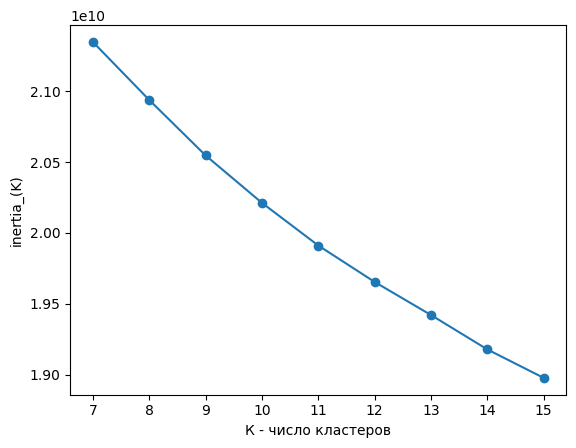

In [98]:
from tqdm.notebook import tqdm
n_c = range(7, 16)
inertia = [KMeans(n_clusters=k, random_state=random_state).fit(X_train.reshape(-1,784)).inertia_ for k in tqdm(n_c)]

plt.plot(n_c, inertia, marker='o')
plt.xlabel('К - число кластеров')
plt.ylabel('inertia_(K)')
plt.show


Все эти обучения черезчур уж долгие. Давайте сделаем «ход конем» и понизим размерность данных, пытаясь сохранять расстояния между объектами. Посмотрим, как это скажется на скорости и точности.

Преобразуйте <b>тренировочный набор</b> данных при помощи метода <a href="https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html"><code>TSNE</code></a> из библиотеки <code>sklearn</code>. Используйте параметры, указанные в вашем задании.

In [99]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, init='random', random_state=random_state)
projections = tsne.fit_transform(X_train.reshape(-1, 784))

In [100]:

np.set_printoptions(threshold=50)
print(projections)
print(projections.shape)
print(X_train.reshape(-1, 784).shape)
print(X_train.shape)
print(X_train.reshape(-1, 784))

[[-21.23739   -63.83634  ]
 [-55.838722   36.59784  ]
 [-55.44407     5.922003 ]
 ...
 [ 14.54746   -47.548088 ]
 [ 30.27493    67.053505 ]
 [-12.630657   -6.5318847]]
(8000, 2)
(8000, 784)
(8000, 28, 28)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Произведите кластеризацию полученного набора данных при помощи <code>KMeans</code> с параметрами, указанными в вашем задании. Аналогично проделанному раньше переназначьте метки кластеров на основе метки большинства объектов в рамках кластера. Оцените точность модели на <b>тренировочных данных</b>.

In [102]:
kmeans = KMeans(n_clusters=10, random_state=random_state)
clusters = kmeans.fit_predict(projections)
labels = np.zeros_like(clusters)

for i in range(10):
  mask = (clusters == i)
  labels[mask] = mode(y_train[mask])[0]
  corrected_clusters[mask] = mode(y_train[mask])[0]

print(accuracy_score(y_train, labels))


0.775875


Проблема, однако, известна. `t-SNE` — метод, который не дает правила получения проекций многомерного пространства на, например, двумерное. Тем самым, при появлении новых данных, проекции придется искать заново.

В то же время, еще раз хочется подчеркнуть, как обучение без учителя позволило построить классификатор, который, как будто бы, является результатом решения задачи обучения с учителем.